 # Weatherpy

Using Python requests, APIs, and JSON traversals we can be able to generate 500+ random latitudes and longitudes,
with the help Citipy Python Library and the OpenWeatherMap API , with the API keys  we can use the these tools to retrieve and graphing our scatter plots.  
    
    Latitude VS . Temperature (F)
    Latitude VS. Humidity (%)
    Latitude VS . Cloudiness (%)
    Latitude VS .WindSpeed (mph) 
    

ANALYSIS¶
-----------

*As we are kicking off our Analysis , we can remind ourselves 
the common  and persistent scientific misconseption that the equator is warmer
than the poles because the equator is significantly closer to the sun than are the poles 
For example,many people know that the southern hemisphere experiences winter while the northern hemisphere 
experiences summer (and visa versa), but they explain this phenomenon by erroneously stating 
that the northern hemisphere is closer to the sun in June than it is in December 
because Earth's tilt toward the sun in June makes the northern
hemisphere "bulge out" toward the sun. 


**With that in mind, another misconseption  that we can underline is that as you approach the equator,
the temperature increases.During the end of the calendar year, i.e., November, the temperature is cooler 
in the Northern hemisphere, where latitudes are greater than 0 and the temperature 
is warmer in the Southern hemisphere, where latitudes are less than 0.

***There was no relationship between latitude and humidity, cloudiness and wind speed. 
However, the data suggest that there are more cities with a relative humidity greater 
than 55% and wind speed less than 15 mph. this results an intresting analysis.

**** Most of the cities that have been generated are in the Northen Hemisphere. 

--------------


In [260]:
!pip install citipy

In [261]:
#  import our dependency 

import matplotlib.pyplot as plt
import pandas as pd
import random 
import requests 
import time
import urllib
import json
import numpy as np 
import csv

# Incorporated citypy to determine city based on latitude and longitude

from citipy import citipy 

 #output  file (CSV)
output_data_file = "output_data/cities.csv"
lat_range = (-90,90)
log_range=(-180,180)

In [177]:

world_cities = pd.read_csv("citipy/worldcities.csv")
world_cities.head()

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333


In [178]:
api_key = "74c2eda2bb799d7a7aa09ac35d429d03"

 # Create Cites List from Latitudes and Longitude

In [263]:
# Randomly select 500 cities for weather data.

selected_cities = world_cities.sample(n=500)

#Visualize the selected cities DataFrame.

selected_cities.head()


,Country,City,Latitude,Longitude
35937,ru,goryachiy klyuch,44.630833,39.130000
37955,ru,safonovo,69.060428,33.295228
40633,tr,kilis,36.716111,37.115000
26642,pe,ferrenafe,-6.638889,-79.788889
5597,ci,jacqueville,5.205148,-4.414604


 # Perfom API Calls

In [187]:

#Create a df to add all the data from the API calls.

column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the df.

#url = "http://api.openweathermap.org/data/2.5/weather?"

url = "http://api.openweathermap.org/data/2.5/weather?"
api_key ="74c2eda2bb799d7a7aa09ac35d429d03"
units ="IMPERIAL"

row_count = 1

#print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1
        

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_l

------------------------
Proceesing: City #  1  |  Hobart AU
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=hobart
------------------------
Proceesing: City #  2  |  Yellowknife CA
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=yellowknife
------------------------
Proceesing: City #  3  |  Busselton AU
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=busselton
------------------------
Proceesing: City #  4  |  Raudeberg NO
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=raudeberg
City not found, skipping...
------------------------
Proceesing: City #  5  |  Gueret FR
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=gueret
------------------------
Proceesing: City #  6  |  Bethel US
http://api.openweathermap.org/data

------------------------
Proceesing: City #  47  |  Thompson CA
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=thompson
------------------------
Proceesing: City #  48  |  Jalu LY
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=jalu
------------------------
Proceesing: City #  49  |  Bluff AU
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=bluff
------------------------
Proceesing: City #  50  |  Nikolskoye RU
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=nikolskoye
------------------------
Proceesing: City #  51  |  Georgetown GY
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=georgetown
------------------------
Proceesing: City #  52  |  Gravdal NO
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb

------------------------
Proceesing: City #  94  |  Butaritari KI
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=butaritari
------------------------
Proceesing: City #  95  |  Ambilobe MG
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=ambilobe
------------------------
Proceesing: City #  96  |  Khandyga RU
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=khandyga
------------------------
Proceesing: City #  97  |  Caravelas BR
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=caravelas
------------------------
Proceesing: City #  98  |  Port Elizabeth US
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=port+elizabeth
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  9

------------------------
Proceesing: City #  139  |  Khromtau KZ
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=khromtau
------------------------
Proceesing: City #  140  |  Hithadhoo MV
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=hithadhoo
------------------------
Proceesing: City #  141  |  Insar RU
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=insar
City not found, skipping...
------------------------
Proceesing: City #  142  |  Chapleau CA
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=chapleau
City not found, skipping...
------------------------
Proceesing: City #  143  |  Punta Arenas CL
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=punta+arenas
------------------------
Proceesing: City #  144  |  Be

City not found, skipping...
------------------------
Proceesing: City #  184  |  Avera US
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=avera
------------------------
Proceesing: City #  185  |  Kiama AU
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=kiama
------------------------
Proceesing: City #  186  |  Khandbari NP
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=khandbari
------------------------
Proceesing: City #  187  |  Arlit NE
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=arlit
------------------------
Proceesing: City #  188  |  Yumen CN
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=yumen
------------------------
Proceesing: City #  189  |  Nenjiang CN
http://api.openweathermap.org/data/2.5/weath

------------------------
Proceesing: City #  230  |  Panjab AF
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=panjab
------------------------
Proceesing: City #  231  |  Lafiagi NG
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=lafiagi
------------------------
Proceesing: City #  232  |  Honiara SB
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=honiara
------------------------
Proceesing: City #  233  |  Kankaanpaa FI
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=kankaanpaa
------------------------
Proceesing: City #  234  |  Atambua ID
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=atambua
------------------------
Proceesing: City #  235  |  Bolotnoye RU
http://api.openweathermap.org/data/2.5/weather?appid=74

------------------------
Proceesing: City #  277  |  San Patricio PY
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=san+patricio
------------------------
Proceesing: City #  278  |  Bilma NE
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=bilma
------------------------
Proceesing: City #  279  |  Weymouth US
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=weymouth
------------------------
Proceesing: City #  280  |  Zanjan IR
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=zanjan
City not found, skipping...
------------------------
Proceesing: City #  281  |  Helong CN
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=helong
------------------------
Proceesing: City #  282  |  Shaunavon CA
http://api.openweathermap.o

------------------------
Proceesing: City #  323  |  Saint Anthony US
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=saint+anthony
------------------------
Proceesing: City #  324  |  Beyneu KZ
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=beyneu
------------------------
Proceesing: City #  325  |  Vardo US
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=vardo
------------------------
Proceesing: City #  326  |  Blyth GB
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=blyth
------------------------
Proceesing: City #  327  |  Along IN
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=along
------------------------
Proceesing: City #  328  |  Deputatskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=74c2ed

------------------------
Proceesing: City #  369  |  Salinas US
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=salinas
------------------------
Proceesing: City #  370  |  Kaitangata NZ
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=kaitangata
------------------------
Proceesing: City #  371  |  Bandundu CD
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=bandundu
City not found, skipping...
------------------------
Proceesing: City #  372  |  Nangomba TZ
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=nangomba
------------------------
Proceesing: City #  373  |  Sosnovo-Ozerskoye RU
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=sosnovo-ozerskoye
------------------------
Proceesing: City #  374  |  Lucapa AO
http

------------------------
Proceesing: City #  415  |  Lazaro Cardenas MX
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=lazaro+cardenas
------------------------
Proceesing: City #  416  |  Watrous CA
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=watrous
------------------------
Proceesing: City #  417  |  Grave DE
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=grave
------------------------
Proceesing: City #  418  |  Cagliari IT
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=cagliari
------------------------
Proceesing: City #  419  |  Nouakchott MR
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=nouakchott
------------------------
Proceesing: City #  420  |  Vila IT
http://api.openweathermap.org/data/2.5/weath

------------------------
Proceesing: City #  461  |  Polunochnoye RU
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=polunochnoye
------------------------
Proceesing: City #  462  |  Chakwal PK
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=chakwal
------------------------
Proceesing: City #  463  |  Smithers CA
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=smithers
------------------------
Proceesing: City #  464  |  Guerrero Negro MX
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=guerrero+negro
------------------------
Proceesing: City #  465  |  Waterloo CA
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=waterloo
------------------------
Proceesing: City #  466  |  Dera Bugti PK
http://api.openweathermap.org/

------------------------
Proceesing: City #  507  |  Ljungby SE
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=ljungby
City not found, skipping...
------------------------
Proceesing: City #  508  |  Mutsu JP
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=mutsu
------------------------
Proceesing: City #  509  |  Thunder Bay CA
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=thunder+bay
------------------------
Proceesing: City #  510  |  Kyren RU
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=kyren
------------------------
Proceesing: City #  511  |  Vila Franca do Campo PT
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=vila+franca+do+campo
------------------------
Proceesing: City #  512  |  Daru SL
http://api

------------------------
Proceesing: City #  553  |  Saint-Francois FR
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=saint-francois
------------------------
Proceesing: City #  554  |  Yakeshi CN
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=yakeshi
------------------------
Proceesing: City #  555  |  Zaysan KZ
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=zaysan
------------------------
Proceesing: City #  556  |  Ojinaga US
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=ojinaga
City not found, skipping...
------------------------
Proceesing: City #  557  |  Palmer AU
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=palmer
------------------------
Proceesing: City #  558  |  Salinopolis BR
http://api.openweat

------------------------
Proceesing: City #  600  |  Richards Bay ZA
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=richards+bay
City not found, skipping...
------------------------
Proceesing: City #  601  |  Hedaru TZ
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=hedaru
------------------------
Proceesing: City #  602  |  Santa Isabel do Rio Negro BR
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=santa+isabel+do+rio+negro
City not found, skipping...
------------------------
Proceesing: City #  603  |  Tateyama JP
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=tateyama
------------------------
Proceesing: City #  604  |  Eureka US
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=eureka
City not found, skipping.

------------------------
Proceesing: City #  645  |  Urengoy RU
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=urengoy
------------------------
Proceesing: City #  646  |  San Vicente SV
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=san+vicente
City not found, skipping...
------------------------
Proceesing: City #  647  |  Tromso NO
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=tromso
City not found, skipping...
------------------------
Proceesing: City #  648  |  Salamiyah SY
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=salamiyah
------------------------
Proceesing: City #  649  |  Polewali ID
http://api.openweathermap.org/data/2.5/weather?appid=74c2eda2bb799d7a7aa09ac35d429d03&units=IMPERIAL&q=polewali


In [252]:
clean_cities_df.count()  

City                649
Country             649
Temperature (F)     649
Latitude            649
Longitude           649
Humidity (%)        649
Cloudiness (%)      649
Wind Speed (mph)    649
dtype: int64

In [192]:
# let Reset the Iindex 
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head(10)


,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Hobart,AU,62.6,-42.88,147.33,88,75,5.82
1,Yellowknife,CA,-41.81,62.45,-114.38,64,5,3.36
2,Busselton,AU,68.08,-33.64,115.35,100,0,21.88
3,Raudeberg,NO,27.77,61.99,5.14,80,20,10.29
4,Gueret,FR,37.4,46.17,1.87,69,90,9.17
5,Bethel,US,33.03,60.79,-161.76,100,90,8.05
6,Jamestown,AU,71.23,-33.21,138.6,42,0,6.6
7,Manta,RO,48.55,45.1,24.1,94,44,6.22
8,Angoche,MZ,84.51,-16.23,39.91,98,24,11.3
9,Atuona,PF,79.56,-9.8,-139.03,100,100,17.4


In [193]:
# Save data to a CSV file
clean_cities_df.to_csv("citipy/worldcities.csv")

# Latitude vs. Temperature

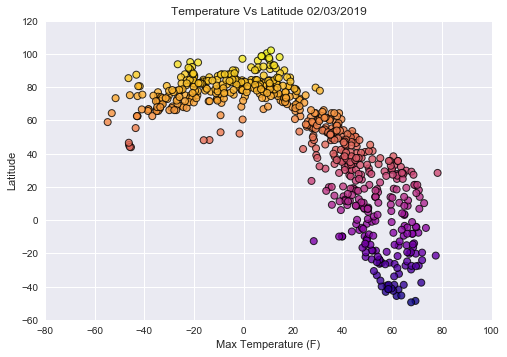

In [218]:

#Build a scatter plot for Temperature Vs Latitude

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Temperature (F)"], c=clean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"Temperature Vs Latitude {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])
# Save the figure
plt.savefig("citipy/Temperature & Latitude.png")

# Show plot
plt.show()

 # Latitude vs. Humidity (%)

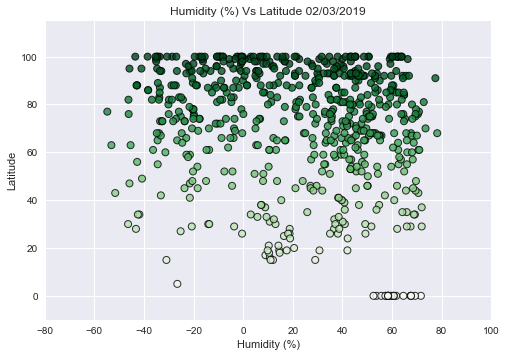

In [241]:
#Build a scatter plot for Humidity Vs Latitude

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c= clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Greens', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"Humidity (%) Vs Latitude {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 115])
# Save the figure
plt.savefig("citipy/Humidity Vs Latitude .png")

# Show plot
plt.show()


# Latitude vs. Cloudiness (%)

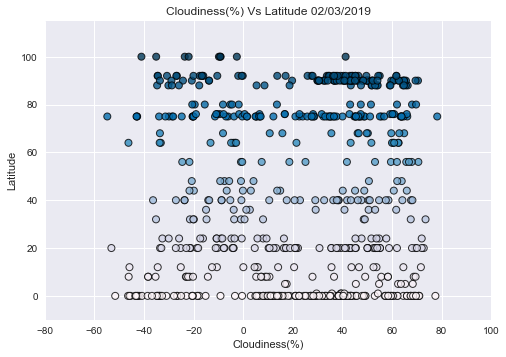

In [240]:
#Build a scatter plot for Cloudiness Vs  Latitude

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c= clean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='PuBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"Cloudiness(%) Vs Latitude {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Cloudiness(%)")
plt.ylabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 115])
# Save the figure
plt.savefig("citipy/Cloudiness(%) Vs Latitude .png")

# Show plot
plt.show()


# Latitude vs. Wind Speed (mph)

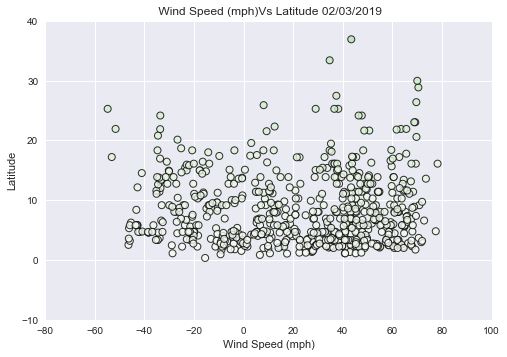

In [239]:
#Build a scatter plot for Wind Speed Vs Latitude

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c= clean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Greens', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f" Wind Speed (mph)Vs Latitude {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 40])
# Save the figure
plt.savefig("citipy/ Wind Speed (mph) Vs Latitude .png")

# Show plot
plt.show()
